# 项目：航空公司乘客满意度预测_机器学习_思路1

## 1. 分析目标

该数据集包含航空公司乘客满意度调查结果，可以用于分析哪些因素与满意（或不满意）的乘客高度相关，并构建机器学习模型，预测乘客的满意度水平（1.满意 2.中立或不满意）。  

## 2. 简介

数据每列含义如下：
- `Gender`: 乘客的性别（女、男）
- `Customer Type`: 乘客类型（忠实客户、流动性客户）
- `Type of Travel`：乘客的飞行目的（个人旅行、商务旅行）
- `Class`：乘客乘坐飞机的旅行舱（Business - 商务舱、Eco - 经济舱、Eco-Plus - 舒适经济舱）
- `Flight Distance`：这段旅程的飞行距离
- `Inflight wifi service`：机上无线网络服务的满意度（0：没有；1-5）
- `Departure/Arrival time convenient`：离港/抵达时间方便的满意度
- `Ease of Online booking`：在线预订的满意度
- `Gate location`：登机口位置满意度
- `Food and drink`：食品和饮料的满意度
- `Satisfaction level of online boarding`：在线登机的满意度
- `Seat comfort`：座椅舒适度的满意度
- `Inflight entertainment`：机上娱乐的满意度
- `On-board service`：机上服务满意度
- `Leg room service`：腿部空间满意度
- `Baggage handling`：行李处理的满意度
- `Check-in service`：登机服务满意度
- `Inflight service`：机上服务满意度
- `Cleanliness`：清洁度满意度
- `Departure Delay in Minutes`：出发时延迟的分钟数
- `Arrival Delay in Minutes`：抵达时延迟的分钟数
- `Satisfaction`：航空公司满意度（满意、中立或不满意）

💡先安装scikit-learn-intelex加速器。`pip install scikit-learn-intelex`  
  
借助 Intel(R) Extension for Scikit-learn，您可以加速您的 Scikit-learn 应用程序，并且仍然完全符合所有 Scikit-Learn API 和算法。这是一款免费软件 AI 加速器，可为各种应用带来超过10-100 倍的加速。而且您甚至不需要更改现有代码！

## 3. 读取数据

导入数据分析所需要的库，并通过Pandas的`read_csv`函数，将原始数据文件"airline_survey_train.csv"里的数据内容，解析为DataFrame，并赋值给变量`original_data`。

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',None)

In [3]:
train = pd.read_csv("airline_survey_train.csv")
test = pd.read_csv("airline_survey_test.csv")

In [4]:
train.shape

(103904, 25)

In [5]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
train = train.drop(['Unnamed: 0', 'id'], axis=1)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
test.shape

(25976, 25)

In [9]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [10]:
test = test.drop(['Unnamed: 0', 'id'], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

将列名中的空格用下划线进行取代：

In [11]:
train.columns = [c.replace(' ', '_') for c in train.columns]

In [12]:
test.columns = [c.replace(' ', '_') for c in test.columns]

In [13]:
train.sample()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
53594,Female,Loyal Customer,55,Business travel,Business,2773,3,3,3,3,5,5,4,5,5,5,5,5,5,3,37,28.0,satisfied


In [14]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)

In [15]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)

### 检查数据的不均衡性

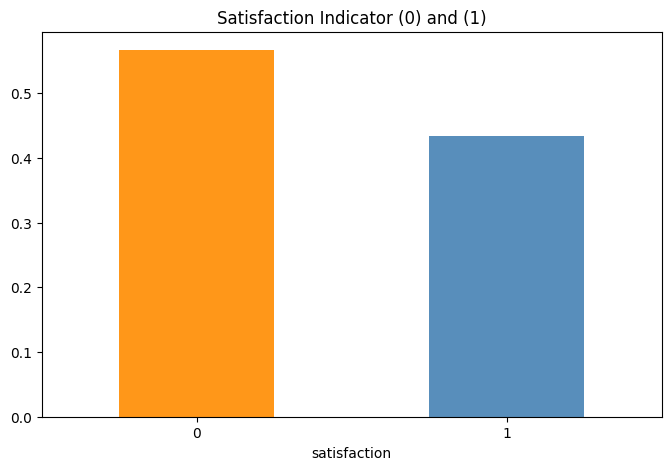

In [16]:
fig = plt.figure(figsize=(8,5))
train.satisfaction.value_counts(normalize=True).plot(kind='bar', color=['darkorange', 'steelblue'], alpha=0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1)')
plt.show()

以上结果图显示，不满意与满意占比大约为55%：45%，比较均衡，不需要对数据进行特殊处理或者重采样。

### 处理缺失值

In [17]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984
Gender,0,0.000000
Seat_comfort,0,0.000000
Departure_Delay_in_Minutes,0,0.000000
Cleanliness,0,0.000000


以平均值填补缺失值：

In [18]:
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())

In [19]:
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

### 检查分类变量

In [20]:
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

### 对于分类变量的NaN，用第一种值代替

In [21]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

In [22]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

## 4. EDA

In [23]:
train.sample()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
60915,Female,Loyal Customer,61,Business travel,Business,2976,5,2,5,5,5,2,4,5,5,5,5,5,5,5,0,0.0,1


#### 分类统计图呈现分类变量不同种类下乘客满意度情况

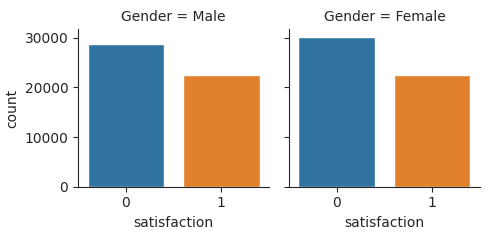

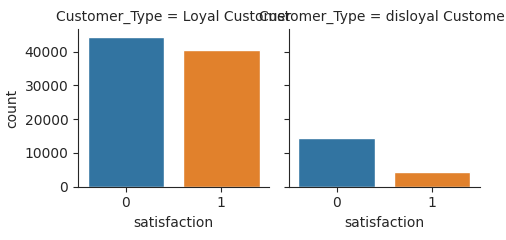

In [24]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x='satisfaction', col='Gender', col_wrap=2, data=train, kind='count', height=2.5, aspect=1)
    g = sns.catplot(x='satisfaction', col='Customer_Type', col_wrap=2, data=train, kind='count', height=2.5, aspect=1)

**性别**：基于性别的满意度分布基本一致，不管是男乘客还是女乘客，不满意的占比均稍高于满意的。  
  
**顾客类型**：首先，忠实客户的数量非常多。其次，即使是在忠实客户中，不满意的乘客也要占比更高一些，不满意与满意的比大致是51：49.

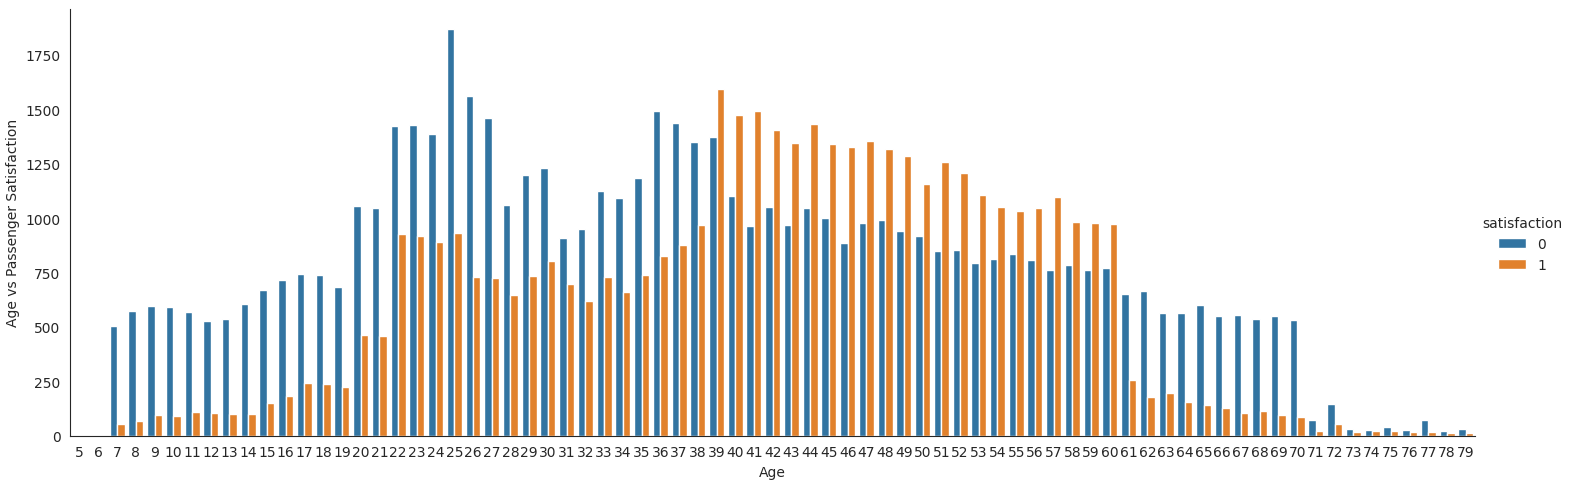

In [25]:
with sns.axes_style(style='white'):
    g = sns.catplot(x='Age', data=train, kind='count', hue='satisfaction', order=range(5,80), aspect=3)
    g.set_ylabels('Age vs Passenger Satisfaction')

**年龄**： 7-38、61-79年龄段的乘客中，不满意所占的都要远高于满意所占的份额。而39-60这个年龄段的乘客，则是满意所占比要高于不满意。

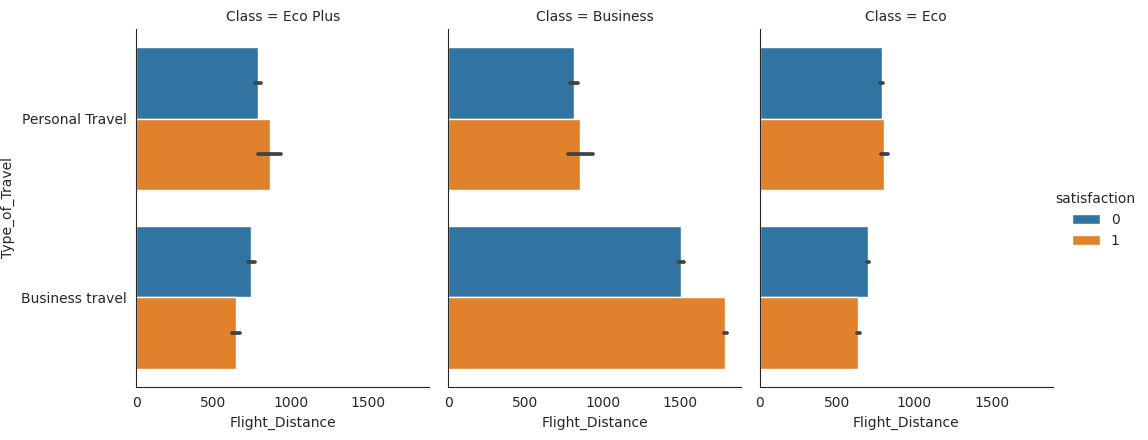

In [26]:
with sns.axes_style(style='white'):
    g = sns.catplot(x='Flight_Distance', y='Type_of_Travel', hue='satisfaction', col='Class', data=train, kind="bar", height=4.5, aspect=.8)

**飞行目的、旅行舱级别、飞行距离**：进行商务旅行并购买商务票的乘客，对于长途旅行有较高的满意度。对于其他条件组合，满意与不满意基本上是持平的。

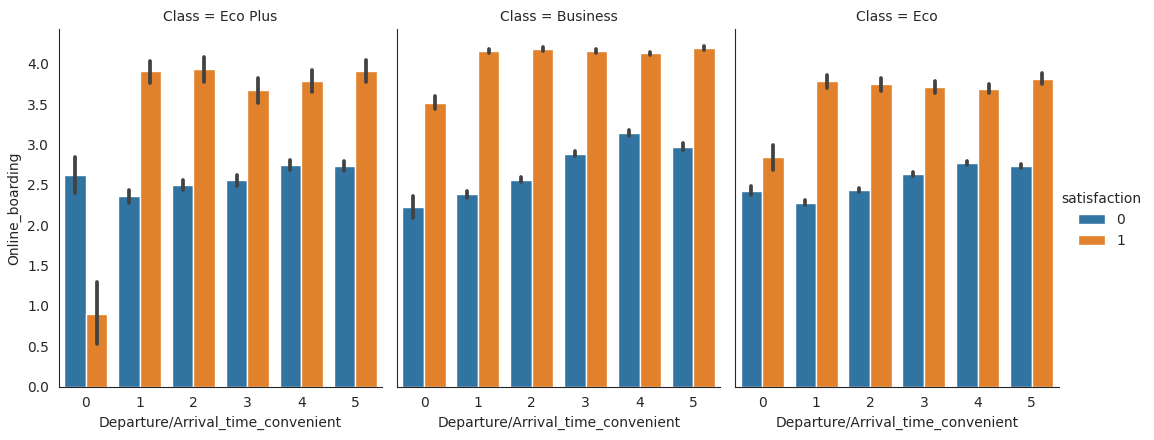

In [27]:
with sns.axes_style(style='white'):
    g = sns.catplot(x='Departure/Arrival_time_convenient', y='Online_boarding', hue='satisfaction', col='Class', data=train, kind="bar", height=4.5, aspect=.8)

**Online Boarding, Departure/Arrival Time Convenience grouped by Class**:   
对于经济升级舱，认为离港/抵达时间非常不方便的乘客(Departure/Arrival_time_convenient = 0)通常也对航司整体不满意,即使他们可能给了在线登机服务比较高的满意度。 而对于其它的条件组合，满意的占比高于不满意。

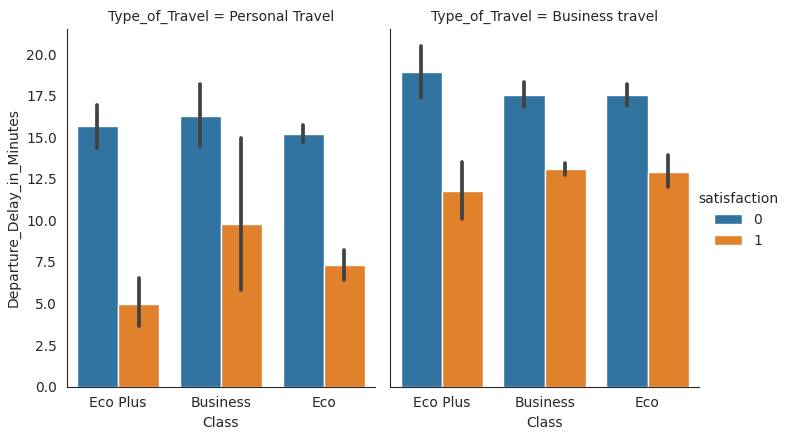

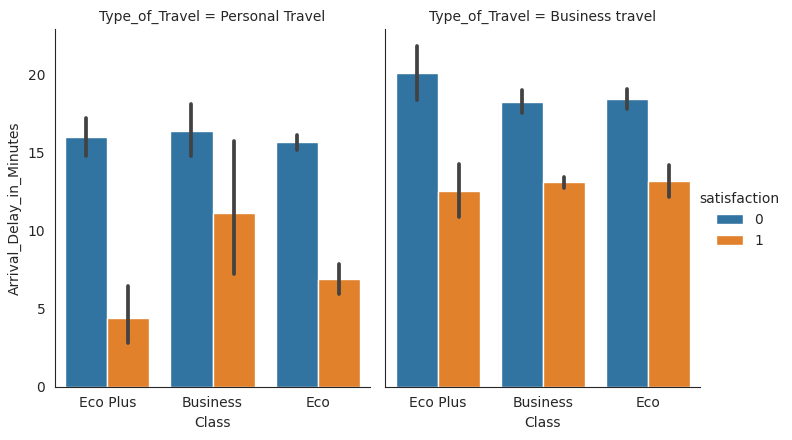

In [28]:
with sns.axes_style(style='white'):
    g = sns.catplot(x='Class', y='Departure_Delay_in_Minutes', hue='satisfaction', col='Type_of_Travel', data=train, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x='Class', y='Arrival_Delay_in_Minutes', hue='satisfaction', col='Type_of_Travel', data=train, kind="bar", height=4.5, aspect=.8)

**Departure Delay, Arrival Delay grouped by Type of Travel**:   
以个人旅行为目的的乘客，尤其是经济升级舱和经济舱的乘客，当抵达时延迟的时间比较高的时候，他们也更加不满意。而且，整体来看，选择“不满意”的乘客他们所对应的航行的出发和抵达延误时间也更长。

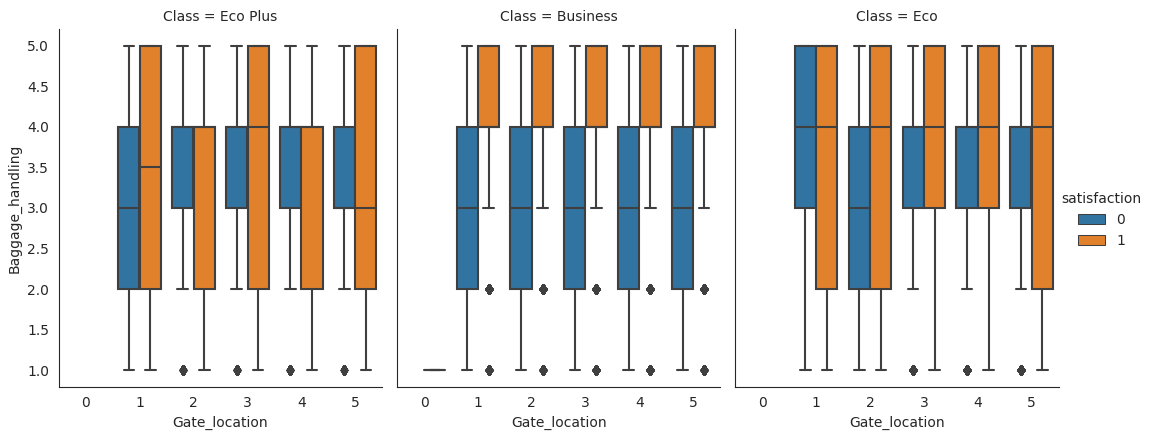

In [29]:
with sns.axes_style(style='white'):
    g = sns.catplot(x='Gate_location', y='Baggage_handling', hue='satisfaction', col='Class', data=train, kind="box", height=4.5, aspect=.8)

**Baggage Handling, Gate Location grouped by Class**:   
商务舱的乘客，不管给登机口位置满意度打多少分，只要行李服务得分稍低(打分<=4)，她们通常会选择“不满意”。  
而经济升级舱、给登机口位置打1分的乘客，以及经济舱给登机口位置便利性打2分的乘客,即使她们给行李服务满意度打了中等分（2-4分），她们也更倾向于“不满意”。

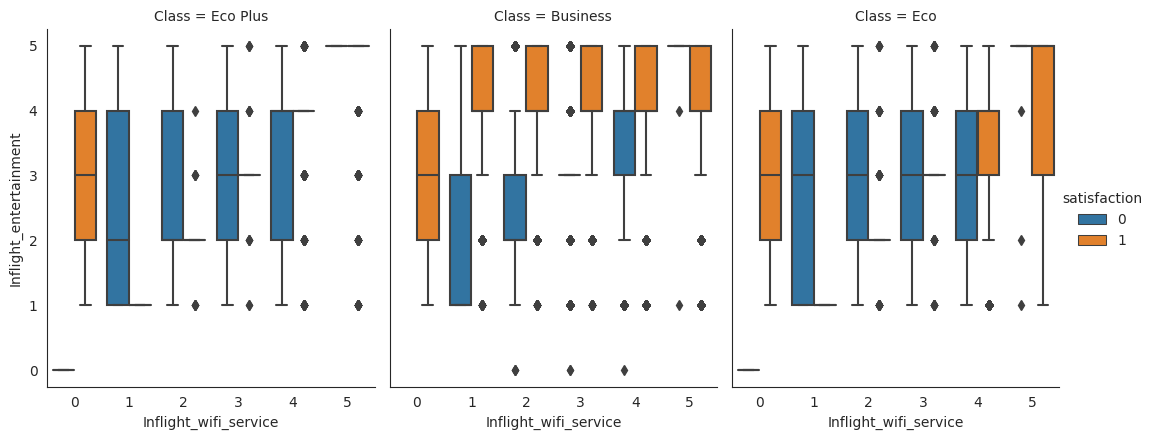

In [30]:
with sns.axes_style(style='white'):
    g = sns.catplot(x='Inflight_wifi_service', y='Inflight_entertainment', hue='satisfaction', col='Class', data=train, kind="box", height=4.5, aspect=.8)

**Inflight Entertainment, Inflight wi-fi Service grouped by Class**:   
- 有趣的是，有一批乘客（所有级别）即使给机上wifi服务打0分并且给机上娱乐服务打中等分数，她们依旧还是大多数报告了“满意”。而对于经济升级舱，只有这部分给机上wifi服务打0分并且给机上娱乐服务打中等分数的乘客报告了“满意”。  
- 对于商务舱乘客，只有机上服务比较好（打5分）时，她们才倾向于报告“满意”。  
- 经济舱乘客，高水平的机上娱乐服务（3-5）以及非常好的wifi服务（5分）才能使他们满意。

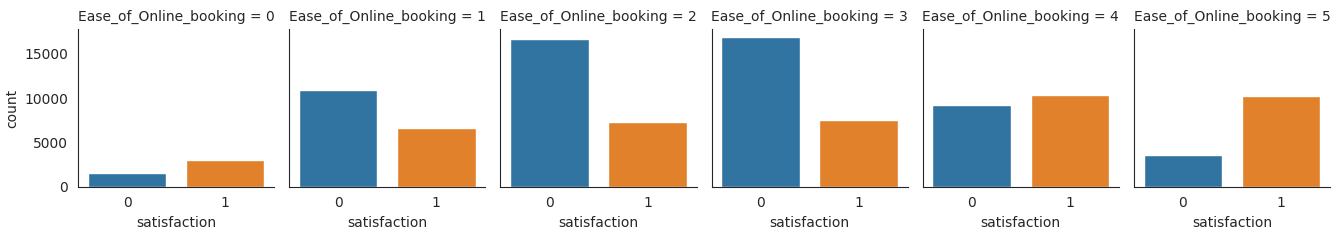

In [31]:
with sns.axes_style(style='white'):
    g = sns.catplot(x='satisfaction', col='Ease_of_Online_booking', col_wrap=6, data=train, kind="count", height=2.5, aspect=.9)

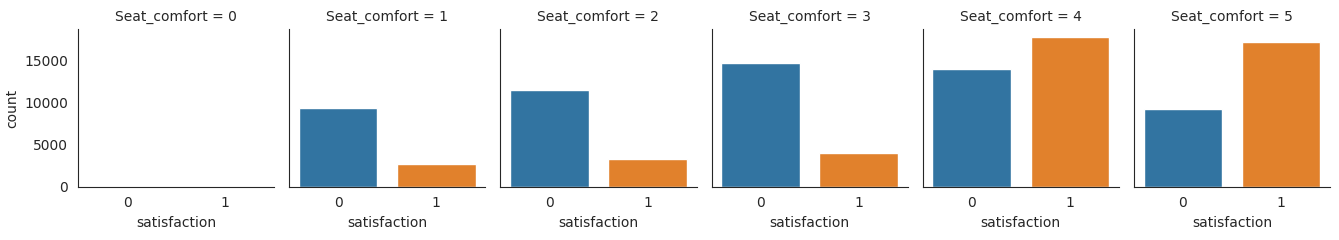

In [32]:
with sns.axes_style(style='white'):
    g = sns.catplot(x='satisfaction', col='Seat_comfort', col_wrap=6, data=train, kind="count", height=2.5, aspect=.9)

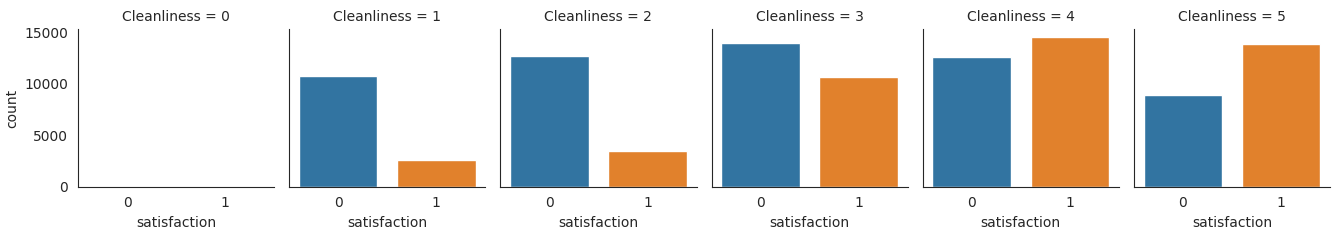

In [33]:
with sns.axes_style(style='white'):
    g = sns.catplot(x='satisfaction', col='Cleanliness', col_wrap=6, data=train, kind="count", height=2.5, aspect=.9)

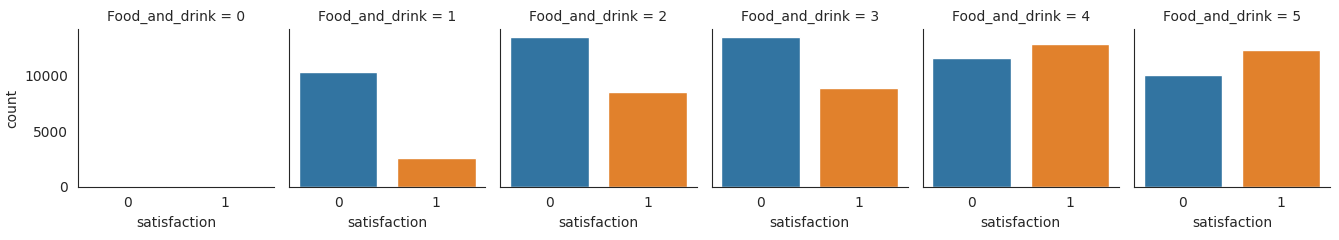

In [34]:
with sns.axes_style(style='white'):
    g = sns.catplot(x='satisfaction', col='Food_and_drink', col_wrap=6, data=train, kind="count", height=2.5, aspect=.9)

**Ease of Online Booking, Seat Comfort, Cleanliness, Food and Drink**:   
对于这些特征，满意数最高的情况都在特征评分为4和5时，4分以下时通常都不满意。

<Axes: xlabel='Leg_room_service', ylabel='satisfaction'>

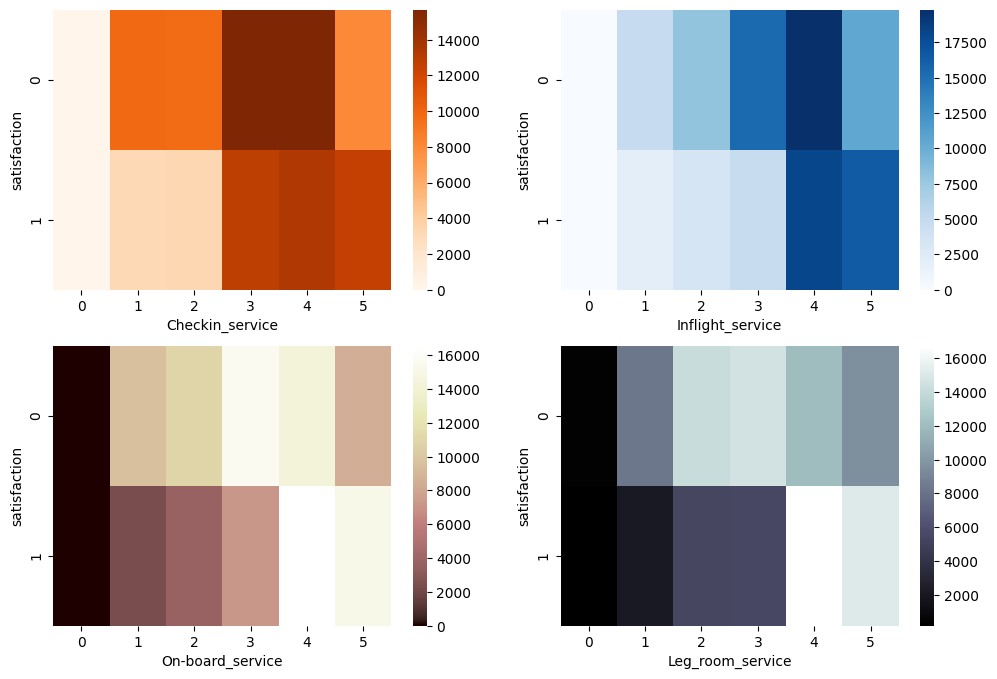

In [35]:
fig, axarr = plt.subplots(2, 2, figsize=(12,8))

table1 = pd.crosstab(train['satisfaction'], train['Checkin_service'])
sns.heatmap(table1, cmap='Oranges', ax=axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Inflight_service'])
sns.heatmap(table2, cmap='Blues', ax=axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board_service'])
sns.heatmap(table3, cmap='pink', ax=axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Leg_room_service'])
sns.heatmap(table4, cmap='bone', ax=axarr[1][1])

**Checkin Service, Inflight Service, On-board Service, Leg-room Service**:   
给登机服务打0-2分的，通常不可避免地也是那些报告不满意的乘客。 对于其它三种服务，只有打4、5分的时候才更有可能报告“满意”。

## 为分类变量进行标签编码

In [36]:
lencoders ={}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder
    train[col] = lencoders[col].fit_transform(train[col], train[col])
# 官方文档说fit_transform(y)就可以，但实际这里确报错说还应该加上X。

In [37]:
train.sample()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
454,1,0,39,0,0,2454,5,5,5,5,5,5,4,5,5,5,5,5,5,3,0,0.0,1


In [38]:
lencoders_t ={}
for col in test.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder
    test[col] = lencoders[col].fit_transform(test[col], test[col])

In [39]:
test.sample()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
20787,0,0,46,0,0,2407,5,2,5,5,2,4,5,5,5,5,5,5,5,3,1,6.0,1


## 异常值检查和移除

In [40]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [41]:
# 移除异常值
train = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(61197, 23)

## 特征之间的相关

<Axes: >

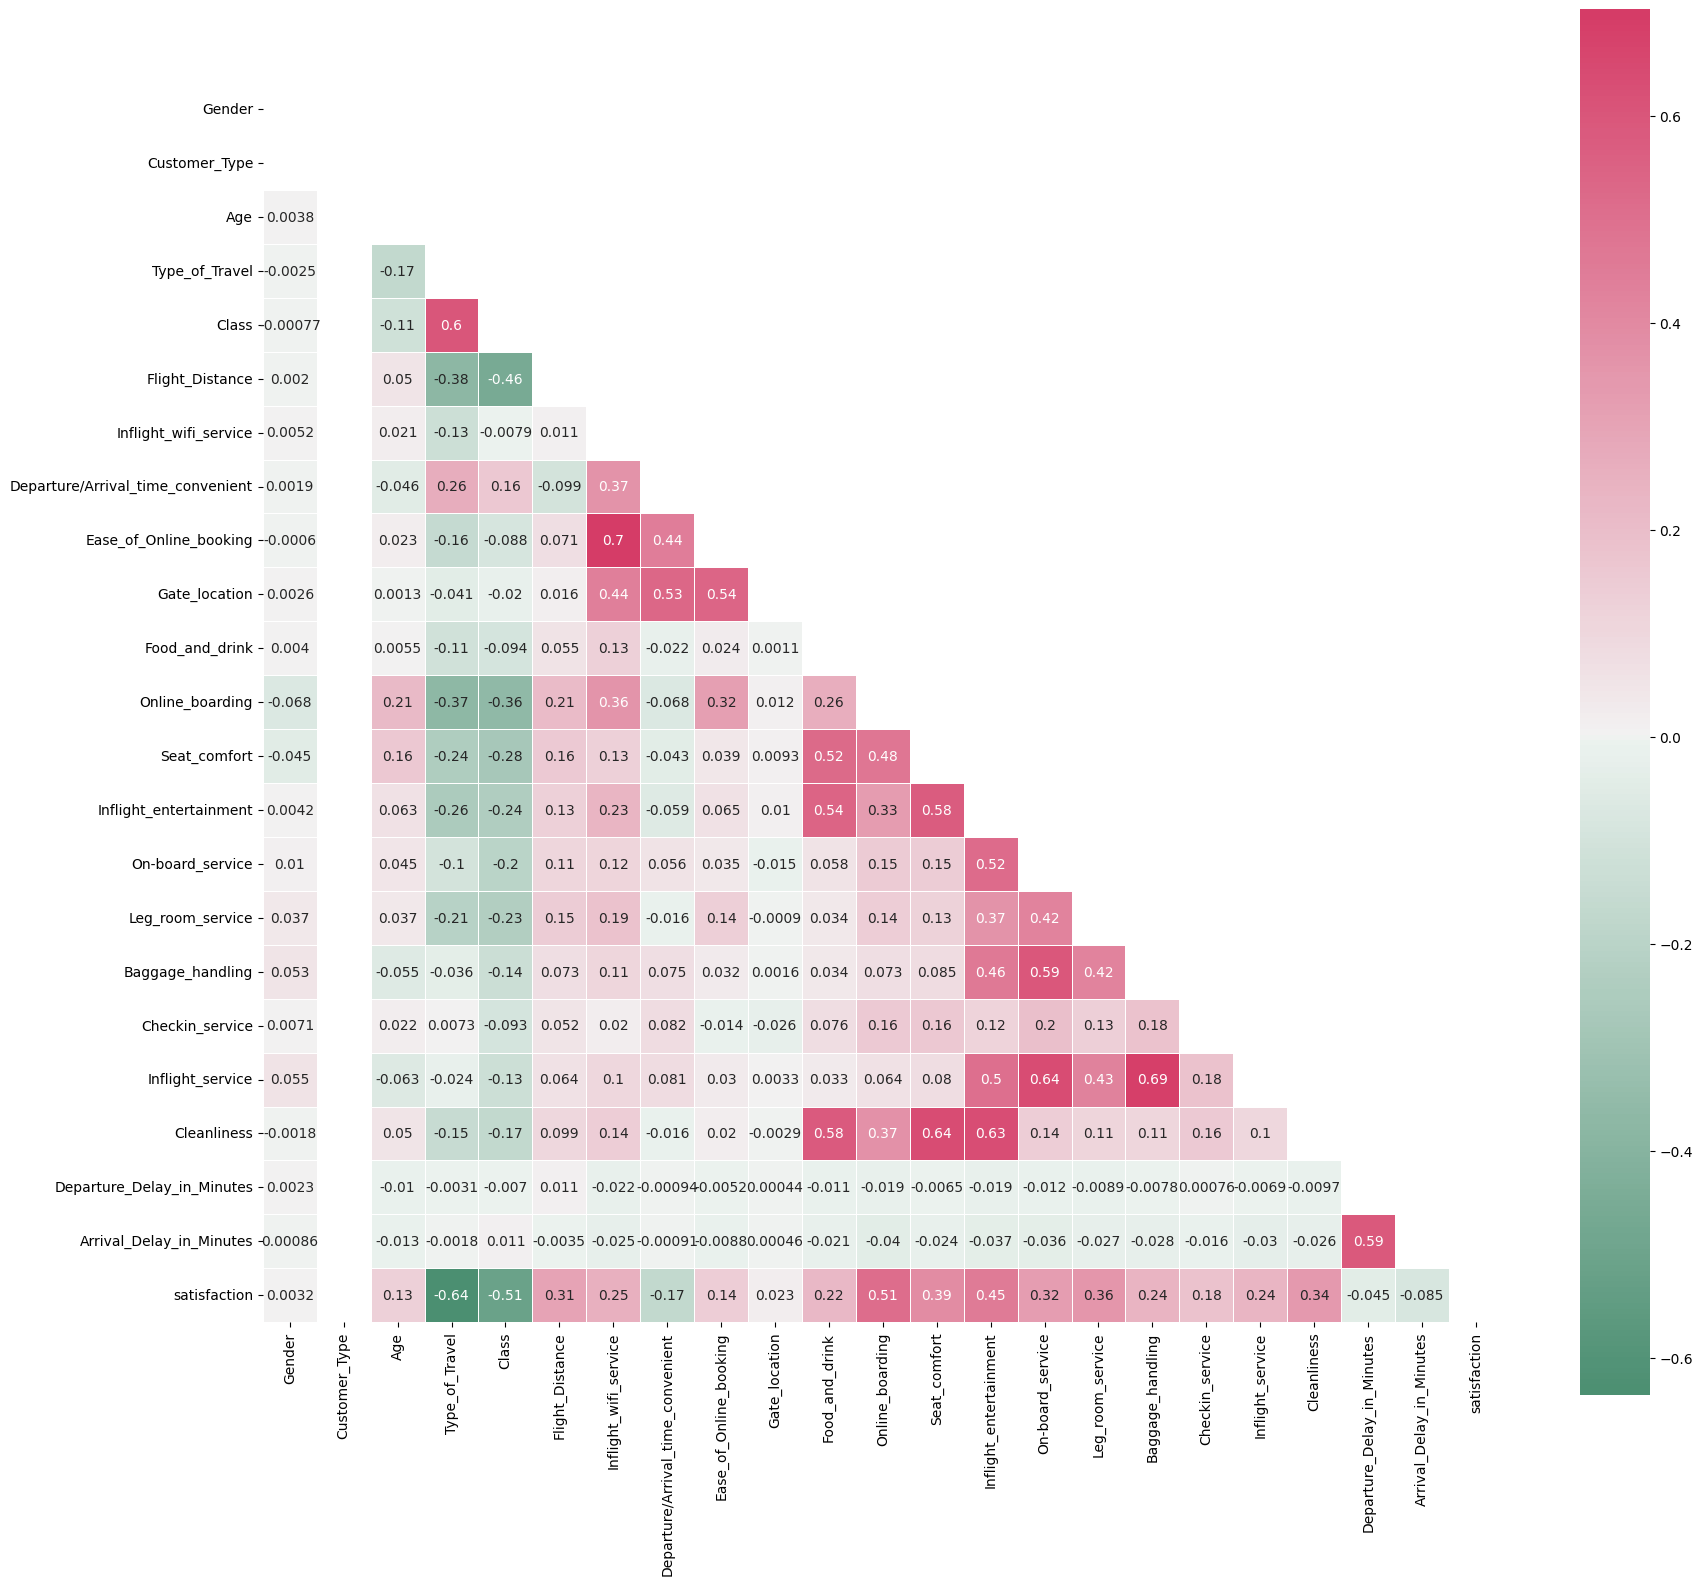

In [42]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

在线订票的便利性满意度"Ease_of_Online_booking"与机上wifi服务满意度"Inflight_wifi_service"成高度正相关。机上服务"Inflight_service"与行李服务"Baggage_handling"也高度正相关。但是，特征对之间的相关最高为0.7，没有高达接近1的。所以，特征之间并没有很高的多重共线性，不需要舍去任何特征。

## 使用卡方选取前10个特征

In [43]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,0.2,1.0,0.6,1.00,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,0.4,1.0,1.0,1.00,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,0.6,0.8,1.0,1.00,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,0.2,0.2,0.4,0.00,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,0.6,0.4,0.4,0.25,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [44]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:, modified_data.columns!='satisfaction']
Y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X,Y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Cleanliness'],
      dtype='object')


以上是使用SelectKBest和chi2选取出来的对于满意度影响较高的前10个特征。接下来，我们将使用其它方法来检查这些个特征的重要性/贡献性。

## 使用Wrapper方法查看特征重要性

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:, support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment']
[0.003895   0.         0.02596584 0.21356939 0.08912931 0.03207134
 0.11975131 0.01686338 0.03115793 0.0144088  0.01162215 0.13365755
 0.05776406 0.05775921 0.02854436 0.04245597 0.02661465 0.02372619
 0.02269651 0.0335434  0.00652532 0.00827832]


因此，只有以上这6个特征对于乘客满意度有可靠的贡献性/重要性。  
接下来，我们将尝试使用另一种方法来看特征的重要性。

## Feature Permutation Importance

In [46]:
import warnings
warnings.filterwarnings("ignore")

eli5库，可以用来调试机器学习分类器并解释它们的预测，显示特征的重要性。

In [47]:
'''
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y), random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())
'''

'\nimport eli5\nfrom eli5.sklearn import PermutationImportance\n\nperm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y), random_state=1).fit(X,y)\neli5.show_weights(perm, feature_names = X.columns.tolist())\n'

In [48]:
# 报错ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' 
# 查了一下，说是1.3。0版本用的的是"available if"而不是'if_delegate_has_method' 

## 创建模型

In [49]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance','Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

In [50]:
# 切分训练数据集和测试数据集
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

In [51]:
# 特征标准化处理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [52]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    RocCurveDisplay.from_estimator(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

#### 模型1: Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)

Accuracy = 0.8132891900215584
ROC Area under Curve = 0.8201667535234152
Time taken = 0.2159881591796875
              precision    recall  f1-score   support

           0    0.88771   0.76381   0.82111     14573
           1    0.74384   0.87652   0.80475     11403

    accuracy                        0.81329     25976
   macro avg    0.81578   0.82017   0.81293     25976
weighted avg    0.82455   0.81329   0.81393     25976



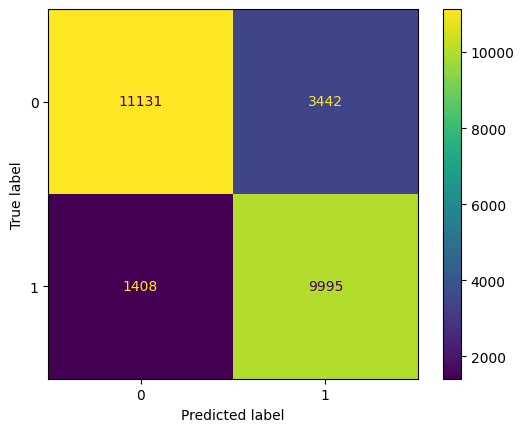

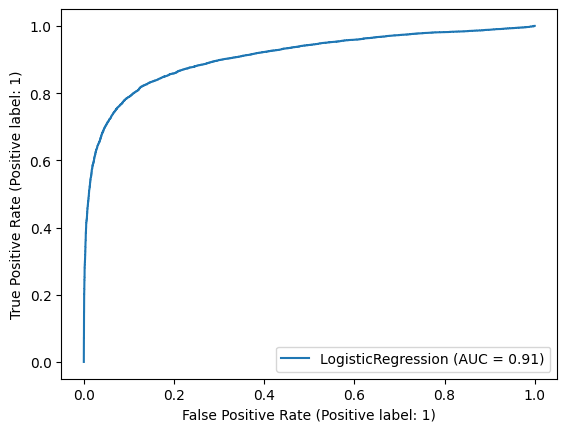

In [53]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver':'saga'}
model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Logistic回归模型是白箱模型（可解释的），所以接下来我们将对这个模型进行更深的考察。

In [54]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.309527
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                61197
Model:                          Logit   Df Residuals:                    61185
Method:                           MLE   Df Model:                           11
Date:                Sat, 16 Sep 2023   Pseudo R-squ.:                  0.5533
Time:                        12:16:10   Log-Likelihood:                -18942.
converged:                       True   LL-Null:                       -42406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6437      0.016   -101.562      0.000      -1.675      -1.612
x2             0.2389      0.

以上结果显示，12个特征中除了第6个特征（机上娱乐服务），其它11个特征均是显著的(p<0.001)，说明它们对于目标特征（满意度）具有很强的解释力和预测作用。同时，模型拟合的R方值为0.5533，说明该模型的拟合还是比较好的。

### 模型2: Naive Bayes Classifier

Accuracy = 0.8334616569140745
ROC Area under Curve = 0.8345493488740688
Time taken = 0.01899862289428711
              precision    recall  f1-score   support

           0    0.87081   0.82564   0.84762     14573
           1    0.79102   0.84346   0.81640     11403

    accuracy                        0.83346     25976
   macro avg    0.83092   0.83455   0.83201     25976
weighted avg    0.83578   0.83346   0.83392     25976



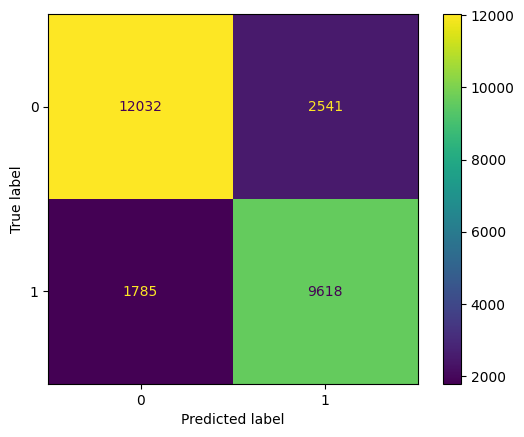

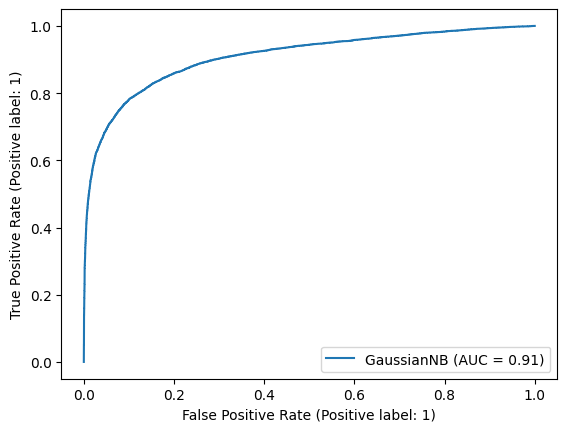

In [55]:
from sklearn.naive_bayes import GaussianNB

params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

### 模型3: K近邻分类器

Accuracy = 0.8865876193409301
ROC Area under Curve = 0.8874674254095746
Time taken = 0.29799580574035645
              precision    recall  f1-score   support

           0    0.91439   0.88026   0.89700     14573
           1    0.85394   0.89468   0.87383     11403

    accuracy                        0.88659     25976
   macro avg    0.88416   0.88747   0.88542     25976
weighted avg    0.88785   0.88659   0.88683     25976



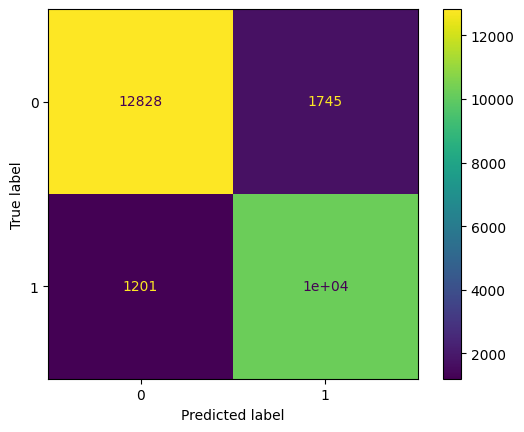

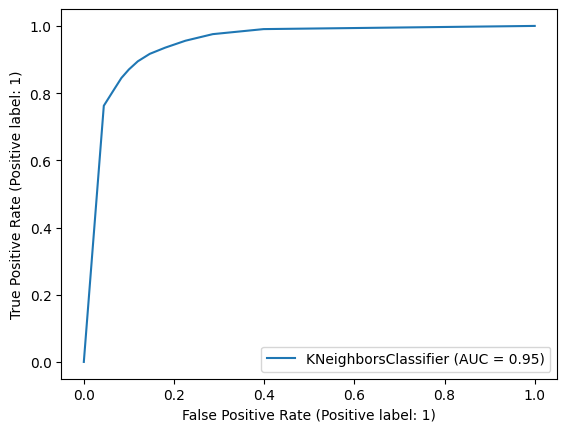

In [56]:
from sklearn.neighbors import KNeighborsClassifier

params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

### 4. 模型4：决策树分类器

Accuracy = 0.8839313212195873
ROC Area under Curve = 0.8860824563876791
Time taken = 0.05499458312988281
              precision    recall  f1-score   support

           0    0.92017   0.86846   0.89356     14573
           1    0.84315   0.90371   0.87238     11403

    accuracy                        0.88393     25976
   macro avg    0.88166   0.88608   0.88297     25976
weighted avg    0.88636   0.88393   0.88427     25976



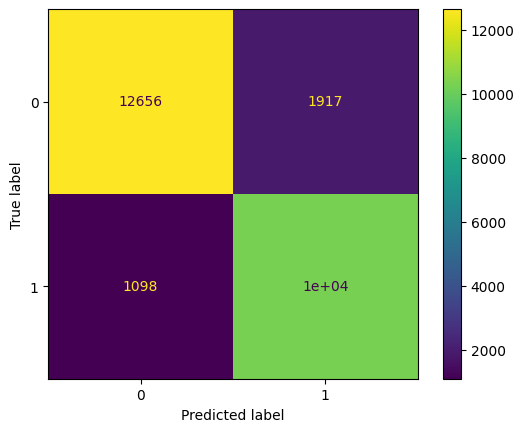

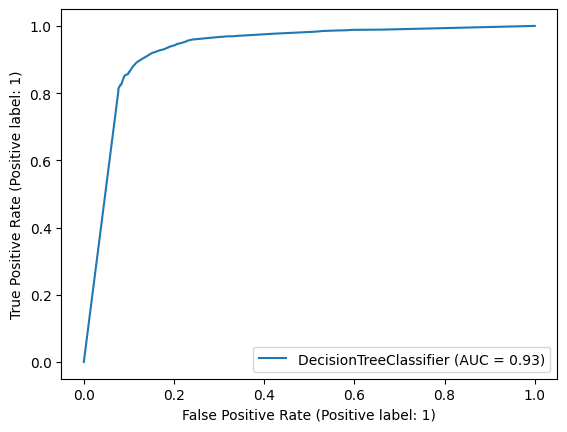

In [57]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

因为决策树也是一个白箱模型（可解释的），所以可以对它更进一步进行可视化，并查看其中哪个特征对于乘客满意度的预测里更大。

In [58]:
# graphviz 安装出问题了，先不进行决策树的可视化了
'''
import graphviz
from sklearn.tree import export_graphviz

features_n = ['Type_of_Travel', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort']
X_train_n = scaler.fit_transform(train[features_n])
data = export_graphviz(DecisionTreeClassifier(max_depth=3).fit(X_train_n, y_train), out_file=None, 
                       feature_names = features_n,
                       class_names = ['Dissatisfied (0)', 'Satisfied (1)'], 
                       filled = True, rounded = True, special_characters = True)
# we have intentionally kept max_depth short here to accommodate the entire visual-tree, best result comes with max_depth = 12
# we have taken only really important features here to accommodate the entire tree picture
graph = graphviz.Source(data)
graph
'''

"\nimport graphviz\nfrom sklearn.tree import export_graphviz\n\nfeatures_n = ['Type_of_Travel', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort']\nX_train_n = scaler.fit_transform(train[features_n])\ndata = export_graphviz(DecisionTreeClassifier(max_depth=3).fit(X_train_n, y_train), out_file=None, \n                       feature_names = features_n,\n                       class_names = ['Dissatisfied (0)', 'Satisfied (1)'], \n                       filled = True, rounded = True, special_characters = True)\n# we have intentionally kept max_depth short here to accommodate the entire visual-tree, best result comes with max_depth = 12\n# we have taken only really important features here to accommodate the entire tree picture\ngraph = graphviz.Source(data)\ngraph\n"

### 模型5: 神经网络模型 Neural Network (Multilayer Perceptron)

Accuracy = 0.8595241761626117
ROC Area under Curve = 0.8692801662796882
Time taken = 34.6040780544281
              precision    recall  f1-score   support

           0    0.95208   0.78934   0.86310     14573
           1    0.77904   0.94922   0.85575     11403

    accuracy                        0.85952     25976
   macro avg    0.86556   0.86928   0.85943     25976
weighted avg    0.87612   0.85952   0.85988     25976



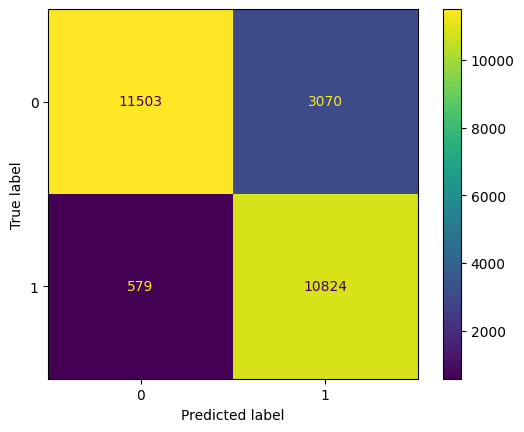

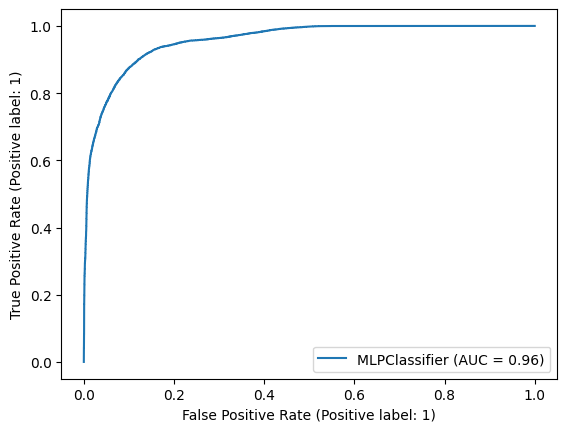

In [59]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

### 模型6：随机森林

Accuracy = 0.8920157068062827
ROC Area under Curve = 0.8984858179120405
Time taken = 0.3379988670349121
              precision    recall  f1-score   support

           0    0.95705   0.84547   0.89780     14573
           1    0.82812   0.95150   0.88553     11403

    accuracy                        0.89202     25976
   macro avg    0.89258   0.89849   0.89167     25976
weighted avg    0.90045   0.89202   0.89242     25976



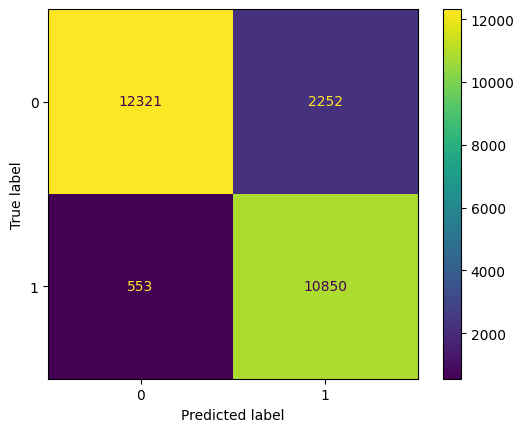

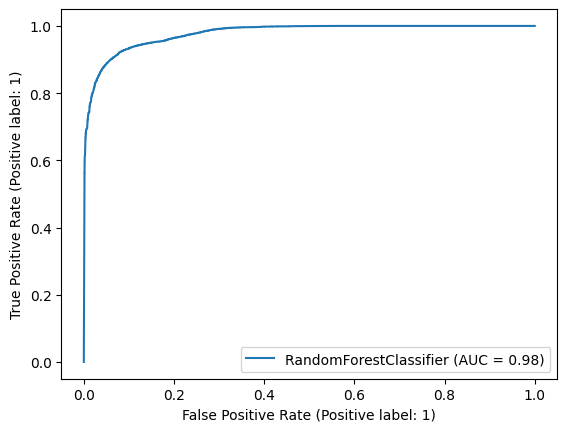

In [60]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

随机森林模型不管是在预测准确性上还是在roc面积上表现都很好。

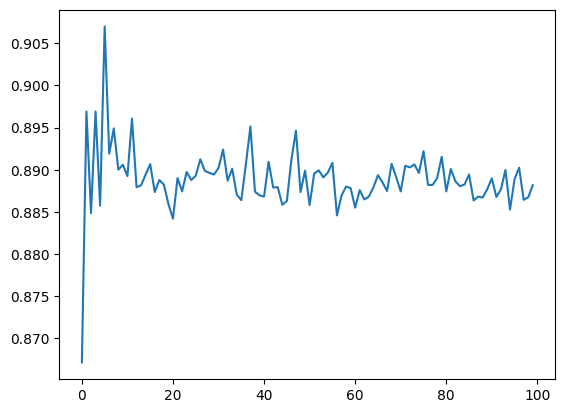

In [61]:
trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

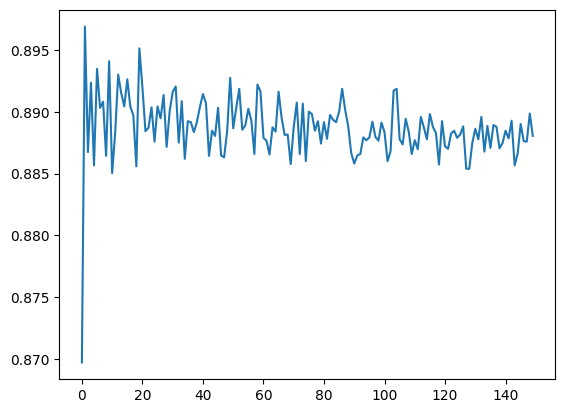

In [62]:
trees=range(150)
accuracy=np.zeros(150)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

以上图表可以看出，最少40棵决策树能使预测准确性保持比较稳定一致（该处有相对较小的波动）。

### 模型7: Adaptive Gradient Boosting

Accuracy = 0.8955189405605174
ROC Area under Curve = 0.8996241085930146
Time taken = 16.134399890899658
              precision    recall  f1-score   support

           0    0.94313   0.86599   0.90291     14573
           1    0.84494   0.93326   0.88691     11403

    accuracy                        0.89552     25976
   macro avg    0.89403   0.89962   0.89491     25976
weighted avg    0.90002   0.89552   0.89589     25976



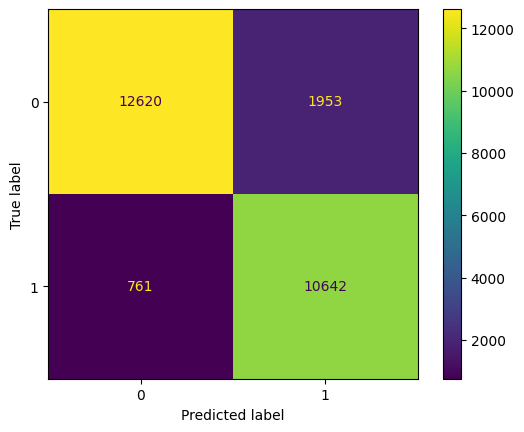

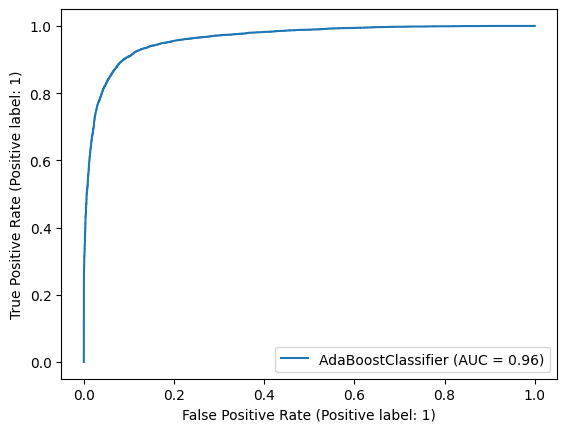

In [65]:
from sklearn.ensemble import AdaBoostClassifier as adab
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = adab(**params_adab)
model_adab, accuracy_adab, roc_auc_adab, tt_adab = run_model(model_adab, X_train, y_train, X_test, y_test)

### 模型比较

In [73]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_nn, tt_rf, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Neural Network','Random Forest','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

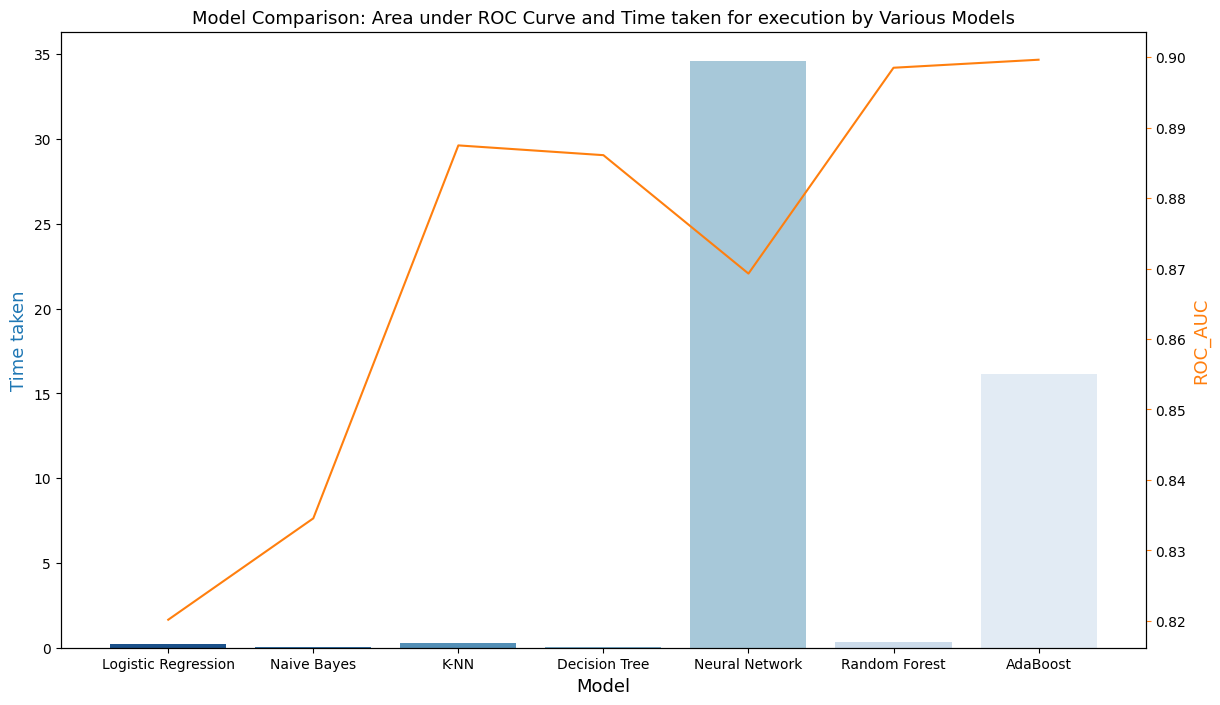

In [74]:
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

【结论】：  
可以观察到，随机森林和AdaBoost表现都非常好，ROC_AUC分数都在90%左右，不过随机森林相比之下花费的时间要少很多，所以我们将选取随机森林模型来进行对乘客满意度的预测。. But Random Forest has taken lesser amount of time compared to time taken by AdaBoost. So, we will stick to Random Forest as the best model.